# Workbook - Purpose

- Visual Vocabulary from FT
- Gramener Vega / Vega-Lite Version of that: https://gramener.github.io/visual-vocabulary-vega/


Purpose

- Distribution
- Ranking 
- Magnitude
- Correlation

In [1]:
import pandas as pd
import altair as alt

### Load data ###

In [2]:
churn = pd.read_csv("data/churn.csv")

In [3]:
churn

,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
CustomerID          7043 non-null object
Gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
Tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [8]:
churn.TotalCharges = pd.to_numeric(churn.TotalCharges.str.replace(" ",""))

In [9]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
CustomerID          7043 non-null object
Gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
Tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7032 non-null float64
Churn               7043 non-null object
dtypes: float64(2), int64(2), ob

In [11]:
alt.data_transformers.enable('json')

DataTransformerRegistry.enable('json')

## Distribution ##

### Histogram ###

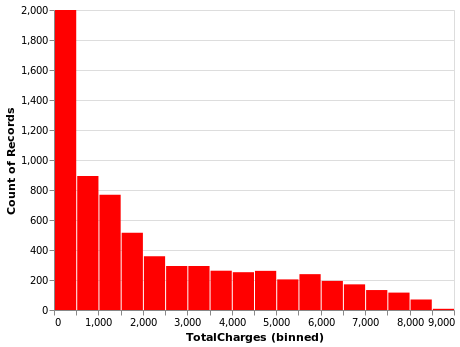

In [15]:
alt.Chart(churn).mark_bar(color="red").encode(
    alt.X("TotalCharges:Q", bin=alt.BinParams(maxbins=20)),
    alt.Y("count()")
)

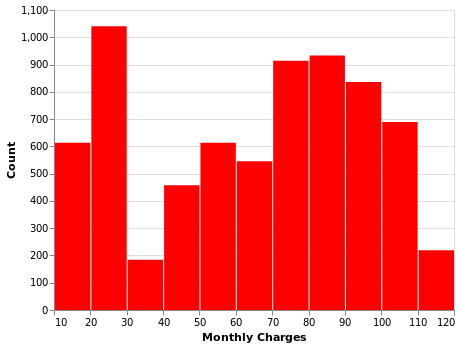

In [17]:
alt.Chart(churn).mark_bar(color="red").encode(
    alt.X("MonthlyCharges:Q", bin=alt.BinParams(maxbins=20), title="Monthly Charges"),
    alt.Y("count()", title="Count")
)

### Frequency Polygon ###

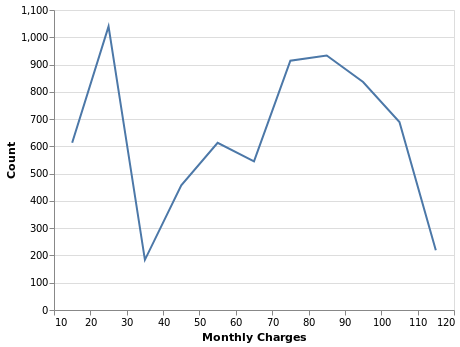

In [74]:
alt.Chart(churn).mark_line().encode(
    alt.X("MonthlyCharges:Q",bin=alt.BinParams(maxbins=20), title="Monthly Charges"),
    alt.Y("count()", title="Count")
)

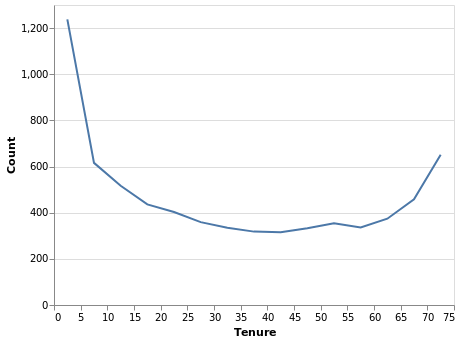

In [76]:
alt.Chart(churn).mark_line().encode(
    alt.X("Tenure:Q", bin=alt.BinParams(maxbins=20), title="Tenure"),
    alt.Y("count()", title="Count")
)

### Boxplot ###

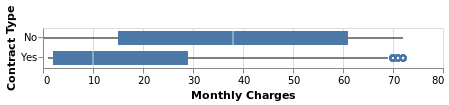

In [81]:
alt.Chart(churn).mark_boxplot().encode(
    alt.X("Tenure:Q", title="Monthly Charges"),
    alt.Y("Churn:N", title="Contract Type")
)

### Population pyramid ###

In [82]:
left = alt.Chart(churn).mark_bar(color="blue", opacity=0.3).encode(
    alt.Y("Tenure:Q", title="Tenure", bin=alt.BinParams(maxbins=20), axis=alt.Axis(orient="right")),
    alt.X("count()", title="Count", sort=alt.SortOrder('descending')),
).transform_filter('datum.Churn =="Yes"')

In [83]:
right = alt.Chart(churn).mark_bar(color="red", opacity=0.3).encode(
    alt.Y("Tenure:Q", title=None, bin=alt.BinParams(maxbins=20)),
    alt.X("count()", title="Count")
).transform_filter('datum.Churn =="No"')

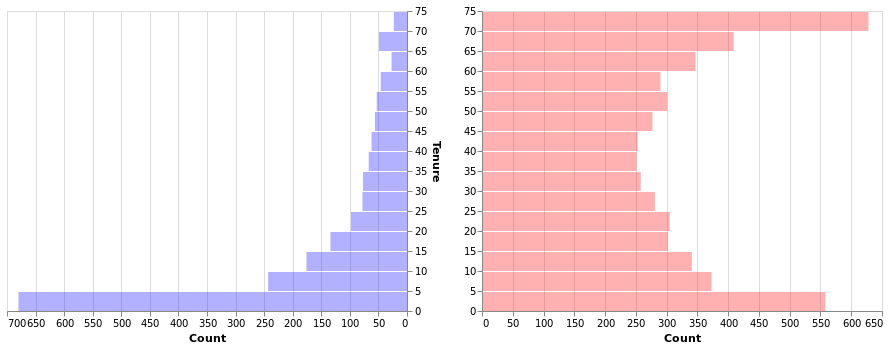

In [80]:
alt.concat(left, right)